# Exploratory Data Analysis
Data Systems Project, Group F4

In [2]:
# ! pip install openpyxl --upgrade
# ! pip install wordcloud
# ! pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [19]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from textstat import flesch_reading_ease
import re
import string
from statistics import mean, stdev

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katonazsofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Auxilliary functions

In [3]:
def word_counter(words):
    wordfreq = {}
    
    # count the words
    for word in words:
        wordfreq[word] = wordfreq.get(word, 0) + 1
        
    return wordfreq    

In [4]:
# Create set of stopwords
stop_words = set(stopwords.words('english'))

def get_words_from_column(column, dataframe):

    # select the sentences
    sentences = []

    # split column into sentences
    for i in dataframe[column]:
        sentences.append(i.lower().split())
        
    # select words from sentences and make lower case
    words = [word.lower() for sentence in sentences for word in sentence]

    # remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return words

In [5]:
def get_sentences_from_column(column, dataframe, printing=False):

    sentences = []

    for text in dataframe[column].dropna():
        sentences.extend(sent_tokenize(text))


    if printing:
        for idx, sentence in enumerate(sentences, start=1):
            print(f"{idx}. {sentence}")

    return sentences

In [6]:
def get_text_from_column(column, dataframe):
    full_text = ''

    for text in dataframe[column]:
        if type(text) == str:
            full_text += ' ' + text

    return full_text

In [7]:
# Function to remove punctuation.
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)

# Function to remove stop words.
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))

    return [word for word in words if word.lower() not in stop_words]

# Showing most common phrases.
def get_phrases(sentences, n, k=None):
    '''
    :param: sentences: list of sentences to get phrases from.
    :param: n: number of words in phrase.
    :param: k: nr of top most frequent phrases to get.
    '''

    # Tokenizing sentences.
    tokenized_sentences = [remove_stopwords(word_tokenize(remove_punctuation(sentence.lower())))
                            for sentence in sentences]

    phrases = list(ngrams([word for sentence in tokenized_sentences for word in sentence], n))

    phrases = [' '.join(phrase) for phrase in phrases]

    if k is not None:
        freq_dist = FreqDist(phrases)

        common_phrases = freq_dist.most_common(k)

        return common_phrases
    
    return phrases

## Loading the dataset

In [8]:
df = pd.read_excel("taxonomy.xlsx")

In [9]:
df.head()

,NACE,Sector,Activity number,Activity,Contribution type,Description,Substantial contribution criteria,DNSH on Climate adaptation,DNSH on Water,DNSH on Circular economy,DNSH on Pollution prevention,DNSH on Biodiversity,Unnamed: 12,Footnotes
0,A2,Forestry,1.1,Afforestation,NaN,"Establishment of forest through planting, deli...",1. Afforestation plan and subsequent forest ma...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,NaN,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,NaN,(1) Establishment of forest through planting o...
1,A2,Forestry,1.2,"Rehabilitation and restoration of forests, inc...",NaN,Rehabilitation and restoration of forests as d...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,NaN,(21) Forest restoration includes: (22) Ecologi...
2,A2,Forestry,1.3,Forest management,NaN,Forest management as defined by national law. ...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,NaN,"(39) Land spanning more than 0,5 hectares with..."
3,A2,Forestry,1.4,Conservation forestry,NaN,Forest management activities with the objectiv...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The activity does not use pesticides or fertil...,In areas designated by the national competent ...,NaN,"(50) Land spanning more than 0,5 hectares with..."
4,NaN,Environmental protection and restoration activ...,2.1,Restoration of wetlands,NaN,Restoration of wetlands refers to economic act...,1.\tRestoration plan1.1. The area is covered b...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,Peat extraction is minimised.,The use of pesticides is minimised and alterna...,In areas designated by the national competent ...,NaN,(64) <em>Wetlands include a wide variety of in...


In [10]:
# Handle missing values by substituting empty string.
df = df.fillna('')

In [11]:
df.head()

,NACE,Sector,Activity number,Activity,Contribution type,Description,Substantial contribution criteria,DNSH on Climate adaptation,DNSH on Water,DNSH on Circular economy,DNSH on Pollution prevention,DNSH on Biodiversity,Unnamed: 12,Footnotes
0,A2,Forestry,1.1,Afforestation,,"Establishment of forest through planting, deli...",1. Afforestation plan and subsequent forest ma...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,,(1) Establishment of forest through planting o...
1,A2,Forestry,1.2,"Rehabilitation and restoration of forests, inc...",,Rehabilitation and restoration of forests as d...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,,(21) Forest restoration includes: (22) Ecologi...
2,A2,Forestry,1.3,Forest management,,Forest management as defined by national law. ...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The use of pesticides is reduced and alternati...,In areas designated by the national competent ...,,"(39) Land spanning more than 0,5 hectares with..."
3,A2,Forestry,1.4,Conservation forestry,,Forest management activities with the objectiv...,1. Forest management plan or equivalent instru...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,The silvicultural change induced by the activi...,The activity does not use pesticides or fertil...,In areas designated by the national competent ...,,"(50) Land spanning more than 0,5 hectares with..."
4,,Environmental protection and restoration activ...,2.1,Restoration of wetlands,,Restoration of wetlands refers to economic act...,1.\tRestoration plan1.1. The area is covered b...,The activity complies with the criteria set ou...,The activity complies with the criteria set ou...,Peat extraction is minimised.,The use of pesticides is minimised and alterna...,In areas designated by the national competent ...,,(64) <em>Wetlands include a wide variety of in...


In [12]:
activity_numbers = [nr for nr in df.loc[:, 'Activity number']]

In [13]:
text_col_indeces = [i for i in range(6,12)]

text_col_names = [name for name in df.columns[text_col_indeces[0]:text_col_indeces[-1]+1]]

print('Name of free text columns:')
for name in text_col_names:
    print(name)

Name of free text columns:
Substantial contribution criteria
DNSH on Climate adaptation
DNSH on Water
DNSH on Circular economy
DNSH on Pollution prevention
DNSH on Biodiversity


In [14]:
# Store the pooled text in each column.
full_texts = {}

for col in text_col_names:
    full_texts[col] = get_text_from_column(col, df)

In [15]:
# Stored the word tokenized text as a list of sentences in a nested dictionary.
tokenized_texts_per_activity = {}

for col in text_col_names:
    tokenized_texts_per_activity[col] = {}

    for i in df.index:
        activity = df.loc[i, 'Activity number']

        tokenized_texts_per_activity[col][activity] = [word_tokenize(sentence) for \
                                                       sentence in sent_tokenize(df.loc[i, col])]

In [16]:
# Store the full tokenized texts as a list of sentences per column.
tokenized_texts = {}

for col in text_col_names:
    tokenized_texts[col] = []

    for activity in activity_numbers:
        tokenized_texts[col].extend(tokenized_texts_per_activity[col][activity])

## Sentence length

Plotting the distribution of sentence length for each of the free text columns.

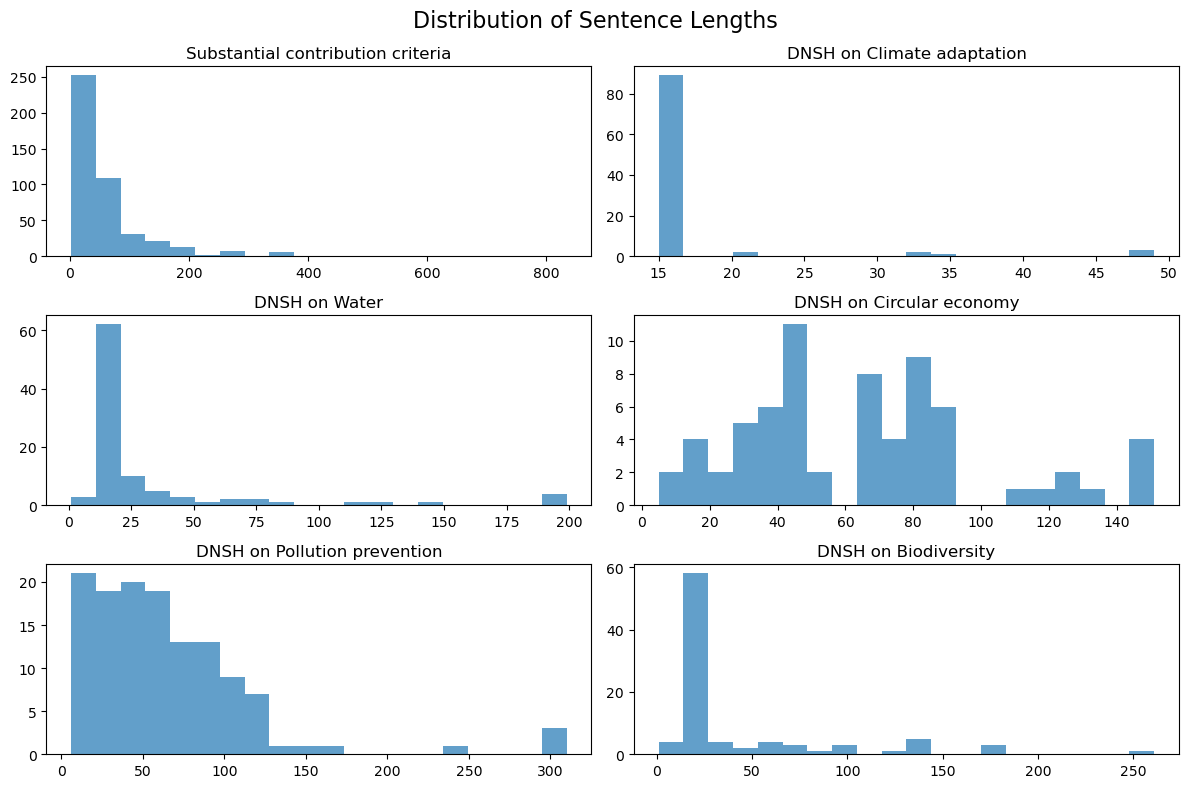

In [20]:
all_sentence_lengths = []

# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Sentence Lengths', fontsize=16)

axes = axes.flatten()

for i, (col, text) in enumerate(tokenized_texts.items()):

    # Calculate the length of each sentence
    sentence_lengths = [len(sentence) for sentence in text]

    axes[i].hist(sentence_lengths, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

    all_sentence_lengths.extend(sentence_lengths)

plt.tight_layout()
plt.show()


In [24]:
print(f'Mean sentence length: {mean(all_sentence_lengths):.2f}')
print(f'Standard deviation {stdev(all_sentence_lengths):.2f}')

Mean sentence length: 51.93
Standard deviation 64.77


## Number of sentences
Plotting the distribution of the number of sentences per activity.

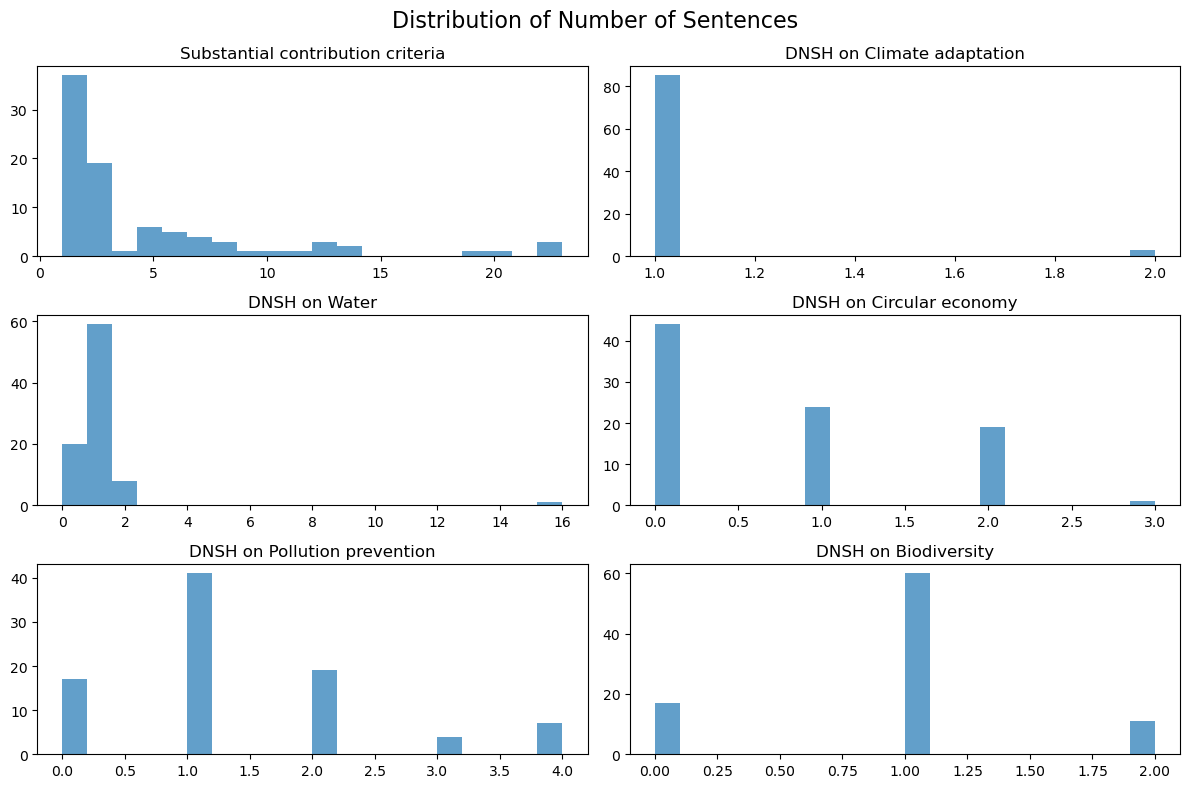

In [25]:
all_nr_sentences = []

# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Number of Sentences', fontsize=16)

axes = axes.flatten()

for i, (col,activities) in enumerate(tokenized_texts_per_activity.items()):

    # Calculate the length of each sentence
    nr_sentences = [len(text) for text in activities.values()]

    axes[i].hist(nr_sentences, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

    all_nr_sentences.extend(nr_sentences)

plt.tight_layout()
plt.show()

In [26]:
print(f'Mean number of sentences: {mean(all_nr_sentences):.2f}')
print(f'Standard deviation {stdev(all_nr_sentences):.2f}')

Mean number of sentences: 1.64
Standard deviation 2.72


## Word length
Plotting the distribution of word lengths across columns.

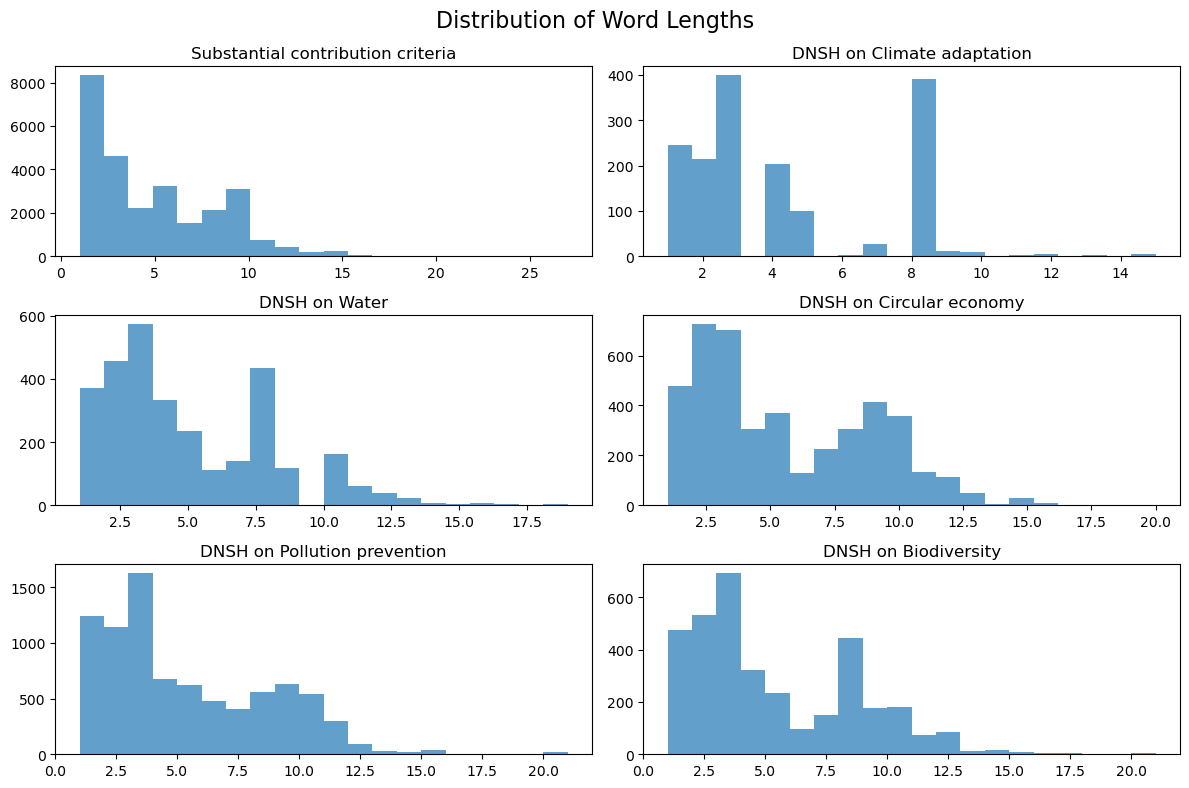

In [27]:
all_word_lengths = []

# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
fig.suptitle('Distribution of Word Lengths', fontsize=16)

axes = axes.flatten()

for i, (col,text) in enumerate(tokenized_texts.items()):

    # Calculate the length of each sentence
    word_lengths = [len(word) for sentence in text for word in sentence ]

    axes[i].hist(word_lengths, bins=20, alpha=0.7)
    axes[i].set_title(f'{col}')

    all_word_lengths.extend(word_lengths)

plt.tight_layout()
plt.show()

In [29]:
print(f'Mean length of words: {mean(all_word_lengths):.2f}')
print(f'Standard deviation {stdev(all_word_lengths):.2f}')

Mean length of words: 4.93
Standard deviation 3.40


## Size of vocabulary

In [30]:
words_per_col = {}

for col, text in tokenized_texts.items():
    words_per_col[col] = []

    for sentence in text:
        for word in sentence:
            words_per_col[col].append(word)

#words_per_col = {col : text.split() for col, text in full_texts.items()}

# Add total list of words to dictionary.

total_words = []

for col, words in words_per_col.items():
    total_words.extend(words)

words_per_col['Pooled'] = total_words

vocab_per_col = {col : set(words) for col, words in words_per_col.items()}

vocab_size_per_col = {col : len(vocab) for col, vocab in vocab_per_col.items()}
    

/var/folders/t3/fn5x2gps4wq728lxf9qrv_lm0000gn/T/ipykernel_9150/2132906358.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(category_names, rotation=45, ha='right')


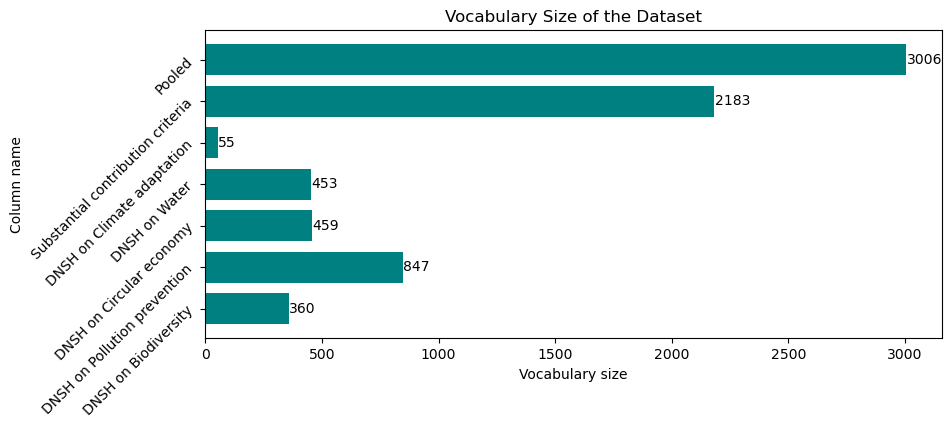

In [38]:
#colors = plt.cm.viridis(np.linspace(0, 1, len(vocab_size_per_col)))

category_names = ['Pooled']
category_names.extend(text_col_names)
category_names = category_names[::-1]

values = [vocab_size_per_col[name] for name in category_names]

fig, ax = plt.subplots(figsize=(9.5, 4))

bars = ax.barh(category_names, values, color='teal', height=0.75, )

for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

ax.set_yticklabels(category_names, rotation=45, ha='right')

ax.set_xlabel('Vocabulary size')
ax.set_ylabel('Column name')
ax.set_title('Vocabulary Size of the Dataset')

plt.show()

## Flesch Reading Ease
Displaying the distribution of Fleisch Reading Ease across all cells with free text.

*Note:* Calculated as `FRE = 206.835 − 1.015 * (total words/total sentences) − 84.6 * (total syllables/ total words)`. Higher scores indicate material that is easier to read, lower numbers mark harder-to-read passages (0-30: College, 50-60: High school, 60+: Fourth grade). 

In [39]:
fre_scores = []

for col in text_col_names:
    for cell in df[col]:
        if cell != '':
            fre_scores.append(flesch_reading_ease(cell))

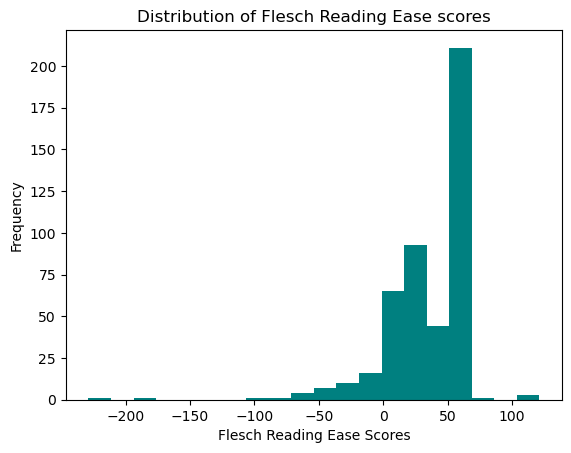

In [41]:
plt.hist(fre_scores, color='teal', bins=20)

plt.title('Distribution of Flesch Reading Ease scores')
plt.xlabel('Flesch Reading Ease Scores')
plt.ylabel('Frequency')

plt.show()

## Checking most frequent words

In [25]:
wordfreq_per_col = {col : word_counter(get_words_from_column(col, df)) \
                    for col in text_col_names}

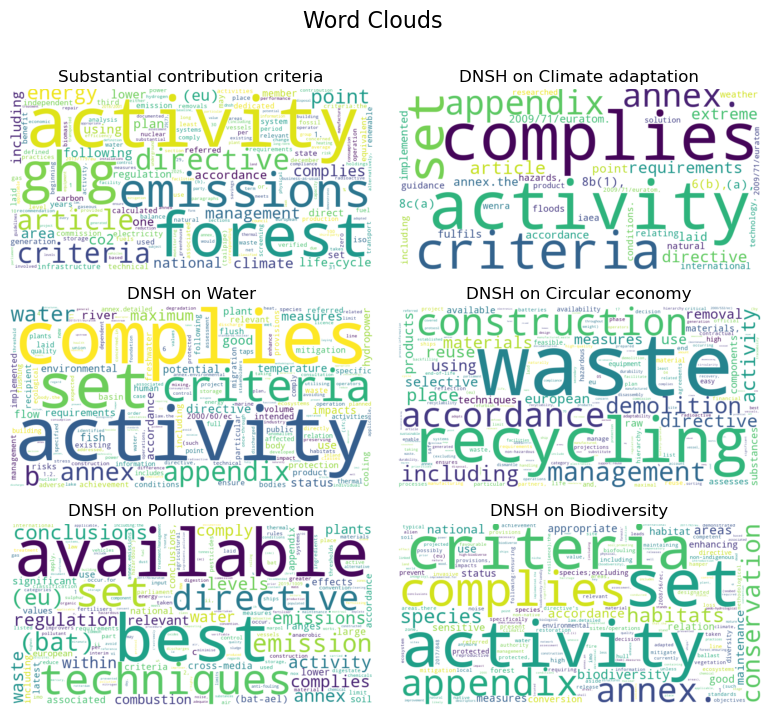

In [26]:
# Number of rows needed in the figure.
num_rows = (len(full_texts) // 2) + (len(full_texts) % 2)

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8))
fig.suptitle('Word Clouds', fontsize=16)

axes = axes.flatten()

for i, (col,wordfreq) in enumerate(wordfreq_per_col.items()):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordfreq)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    
    axes[i].set_title(f'{col}')

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.show()

## Numerical information

In [27]:
sentences_per_col = {col : [] for col in text_col_names}

for col, sentences in sentences_per_col.items():
    for cell in df[col]:
        if cell != '':
            sentences.extend(sent_tokenize(cell))

In [28]:
# Finding sentences with numerical information.

# Pattern is a number in a sentence
# BUT the numbers should not stand in brackets alone, as those refer to footnotes (e.g., (296))
# BUT the numbers should not be adjoint with a /, as those indicate regulations (e.g., 2010/30/EU)
# pattern = re.compile(r'\b\d{2,}(?!(\)|/))\b|\b\d+\([^\)]*\)(?!\d)|(?<!/)\b\d{2,}(?!\d)\b')

pattern = re.compile(r'(?<!\()(?<!/)\b\d+\b(?!\))(?!/)')

nr_numerical = {col : 0 for col in text_col_names}

for col, sentences in sentences_per_col.items():
    count = 0

    for sentence in sentences:
        count += len(re.findall(pattern, sentence))

    nr_numerical[col] = count

In [29]:
# Add the totall number of numerical information to the dictionary.
nr_numerical['Pooled'] = sum(list(nr_numerical.values()))

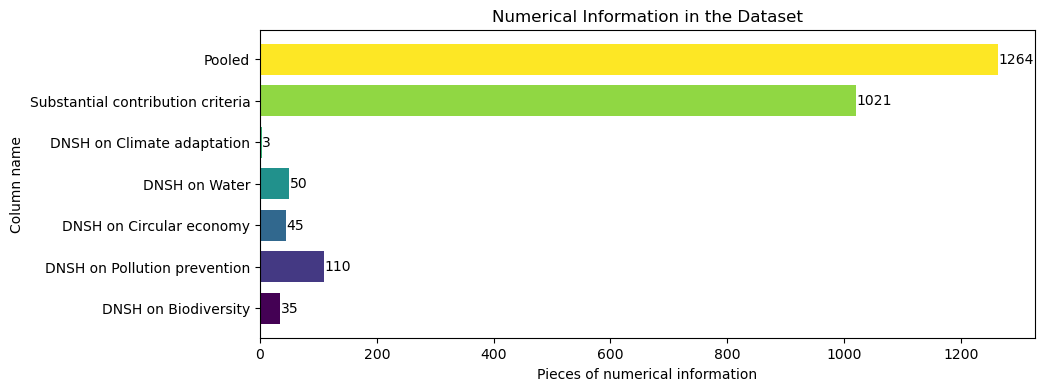

In [30]:
colors = plt.cm.viridis(np.linspace(0, 1, len(vocab_size_per_col)))

category_names = ['Pooled']
category_names.extend(text_col_names)
category_names = category_names[::-1]

values = [nr_numerical[name] for name in category_names]

fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.barh(category_names, values, color=colors, height=0.75)

for bar, value in zip(bars, values):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

ax.set_xlabel('Pieces of numerical information')
ax.set_ylabel('Column name')
ax.set_title('Numerical Information in the Dataset')

plt.show()